## INTRODUCTION TO DATASET

The dataset includes details on different dishes, each of which is an individual dishes for different cuisines. In this note book we will perform following tasks to create different visualizations for the dataset:

**1.** Create and test OOPS classes to generate csv file

**2.** check the csv file for missing values and use necessary techniques to replace missing values.

**3.**  Develop code and generate different types of visualizations 

# Importing the Libraries for visualization

In [84]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a class named Restaurant with the following attributes:
**1.date:** date on which a dish became available.

**2.dish:**  Dish name.

**3. cuisine:** Cuisine name.

**4. type:** Dish type.

**5. rating** Customers’s rating for the dish.

**6. price:** Price of the dish (in USD).

**7. cooking_cost:** Cost incurred to prepare the dish (in USD).

Add another attribute **Unique_Id** and set attribute to **id(self)** - memory id of instance of the class.

In [259]:
class Restaurant:
    def __init__(self, date, dish, cuisine, type, rating, price, cooking_cost):
        self.date = date
        self.dish = dish
        self.cuisine = cuisine
        self.type = type
        self.rating = rating
        self.price = price
        self.cooking_cost = cooking_cost
        self.unique_id = id(self)
    
    def __str__(self):
        return f"{self.unique_id},{self.date},{self.dish},{self.cuisine},{self.type},{self.rating},{self.price},{self.cooking_cost}"


## Create two subclasses Appetizer and MainCourse both inheriting from Restaurant class

In [29]:
class Appetizer(Restaurant):
    def __init__(self, date, dish, cuisine, rating, price, cooking_cost):
        super().__init__(date, dish, cuisine, "Appetizer", rating, price, cooking_cost)


class MainCourse(Restaurant):
    def __init__(self, date, dish, cuisine, rating, price, cooking_cost):
        super().__init__(date, dish, cuisine, "MainCourse", rating, price, cooking_cost)

## Create additional subclasses Soups inheriting from Appetizer

In [31]:
class Soups(Appetizer):
    def __init__(self, date, dish, rating, price, cooking_cost):
        super().__init__(date, dish, "Soups", rating, price, cooking_cost)

## Create two additional subclasses ItalianDish and MexicanDish inheriting from MainCourse

In [33]:
class ItalianDish(MainCourse):
    def __init__(self, date, dish, rating, price, cooking_cost):
        super().__init__(date, dish, "ItalianDish", rating, price, cooking_cost)


class MexicanDish(MainCourse):
    def __init__(self, date, dish, rating, price, cooking_cost):
        super().__init__(date, dish, "MexicanDish", rating, price, cooking_cost)

**After creating classes test the code with an example**

In [35]:
MexicanDishRestaurant = MexicanDish("2022-12-22","Enchiladas", 4.0, 60.13,47.77)
print(str(MexicanDishRestaurant))

2253024845200,2022-12-22,Enchiladas,MexicanDish,MainCourse,4.0,60.13,47.77


**Load the given dataset (pickle file) to read the data using readbinary mode**

In [37]:
import pickle
with open('Restaurantpkl638250110.dat','rb') as fb:
    try:
        while(True):
            objects=pickle.load(fb)
            print(objects)
    except EOFError:
        pass

[<__main__.MexicanDish object at 0x0000020C8F423790>, <__main__.Soups object at 0x0000020C92912190>, <__main__.ItalianDish object at 0x0000020C92912DD0>, <__main__.Soups object at 0x0000020C92913850>, <__main__.Soups object at 0x0000020C929128D0>, <__main__.Soups object at 0x0000020C929136D0>, <__main__.MexicanDish object at 0x0000020C92913110>, <__main__.Soups object at 0x0000020C92913490>, <__main__.MexicanDish object at 0x0000020C929117D0>, <__main__.ItalianDish object at 0x0000020C92918F90>, <__main__.ItalianDish object at 0x0000020C9291AE10>, <__main__.Soups object at 0x0000020C9291A650>, <__main__.MexicanDish object at 0x0000020C929194D0>, <__main__.ItalianDish object at 0x0000020C92918950>, <__main__.Soups object at 0x0000020C9291B310>, <__main__.Soups object at 0x0000020C92918DD0>, <__main__.Soups object at 0x0000020C9291B390>, <__main__.Soups object at 0x0000020C92918A10>, <__main__.ItalianDish object at 0x0000020C929192D0>, <__main__.Soups object at 0x0000020C92918390>, <__ma

## DataFrame Parsing

**Write the data into csv file and load it into a data frame**

In [41]:
with open('data.csv', 'w') as f:
       f.write("unique_id,date,dish,cuisine,type,rating,price,cooking_cost\n")
       for obj in objects:
                      f.write(str(obj)+'\n')
df = pd.read_csv('data.csv')

**display the dataframe and read the values of attributes**

In [198]:
df

,unique_id,date,dish,cuisine,type,rating,price,cooking_cost,month,month_year,revenue
0,135246885572320,2022-04-28,Enchiladas,MexicanDish,MainCourse,1.0,65.0,44.65,2022-04,2022-04,65.0
1,135246885576592,NaT,Hot & Sour Soup,Soups,Appetizer,2.0,74.0,57.94,NaT,NaT,74.0
2,135246885575008,2022-07-26,Margherita Pizza,ItalianDish,MainCourse,2.0,NaN,NaN,2022-07,2022-07,NaN
3,135246885569248,2022-02-18,Chicken Soup,Soups,Appetizer,2.0,NaN,NaN,2022-02,2022-02,NaN
4,135246885577216,2022-01-03,Chicken Soup,Soups,Appetizer,2.0,NaN,NaN,2022-01,2022-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,135246861625200,2022-02-11,Chicken Soup,Soups,Appetizer,1.0,82.0,51.53,2022-02,2022-02,82.0
9996,135246861625248,2022-02-02,Tiramisu,ItalianDish,MainCourse,2.0,86.0,56.65,2022-02,2022-02,86.0
9997,135246861625296,2022-08-23,Hot & Sour Soup,Soups,Appetizer,1.0,78.0,52.09,2022-08,2022-08,78.0
9998,135246861625344,2022-03-02,Spaghetti Bolognese,ItalianDish,MainCourse,2.0,NaN,NaN,2022-03,2022-03,NaN


**check data frame summary for data types of each column, the number of non-null values, and memory usage**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unique_id     10000 non-null  int64  
 1   date          9547 non-null   object 
 2   dish          10000 non-null  object 
 3   cuisine       10000 non-null  object 
 4   type          10000 non-null  object 
 5   rating        9605 non-null   float64
 6   price         9214 non-null   float64
 7   cooking_cost  9214 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


**checking missing or null values for the attributes**

In [16]:
df.isna().sum()

unique_id         0
date            453
dish              0
cuisine           0
type              0
rating          395
price           786
cooking_cost    786
dtype: int64

## Data frame cleaning and transformation

**Replaced the missing values in the date column by taking mode value of the 'date', since it is an categorical attribute**

In [17]:
# Fill 'date' column with mode (most frequent date)
df['date'].fillna(df['date'].mode()[0], inplace=True)

**Replaced the missing values in the rating column by taking median value of the 'rating', since it is an numerical attribute**

In [18]:
# Fill 'rating' column with median
df['rating'].fillna(df['rating'].median(), inplace=True)

**Replaced the missing values in the price column by taking median value of the 'price', since it is an numerical attribute**

In [19]:
# Fill 'price' column with mean
df['price'].fillna(df['price'].mean(), inplace=True)


**Replaced the missing values in the cooking_cost column by taking mean value of the 'cooking_cost', since it is an numerical attribute**

In [20]:
# Fill 'cooking_cost' column with mean
df['cooking_cost'].fillna(df['cooking_cost'].mean(), inplace=True)

## Dataframe after handling missing values

**Rechecking if any null values are still present**

In [21]:
df.isna().sum()

unique_id       0
date            0
dish            0
cuisine         0
type            0
rating          0
price           0
cooking_cost    0
dtype: int64

**Dataframe Schema**

In [22]:
df

,unique_id,date,dish,cuisine,type,rating,price,cooking_cost
0,135246885572320,2022-04-28,Enchiladas,MexicanDish,MainCourse,1.0,65.000000,44.650000
1,135246885576592,2022-01-23,Hot & Sour Soup,Soups,Appetizer,2.0,74.000000,57.940000
2,135246885575008,2022-07-26,Margherita Pizza,ItalianDish,MainCourse,2.0,79.708053,49.473922
3,135246885569248,2022-02-18,Chicken Soup,Soups,Appetizer,2.0,79.708053,49.473922
4,135246885577216,2022-01-03,Chicken Soup,Soups,Appetizer,2.0,79.708053,49.473922
...,...,...,...,...,...,...,...,...
9995,135246861625200,2022-02-11,Chicken Soup,Soups,Appetizer,1.0,82.000000,51.530000
9996,135246861625248,2022-02-02,Tiramisu,ItalianDish,MainCourse,2.0,86.000000,56.650000
9997,135246861625296,2022-08-23,Hot & Sour Soup,Soups,Appetizer,1.0,78.000000,52.090000
9998,135246861625344,2022-03-02,Spaghetti Bolognese,ItalianDish,MainCourse,2.0,79.708053,49.473922


## GENERATING VISUALIZATIONS

**1. BAR CHART**

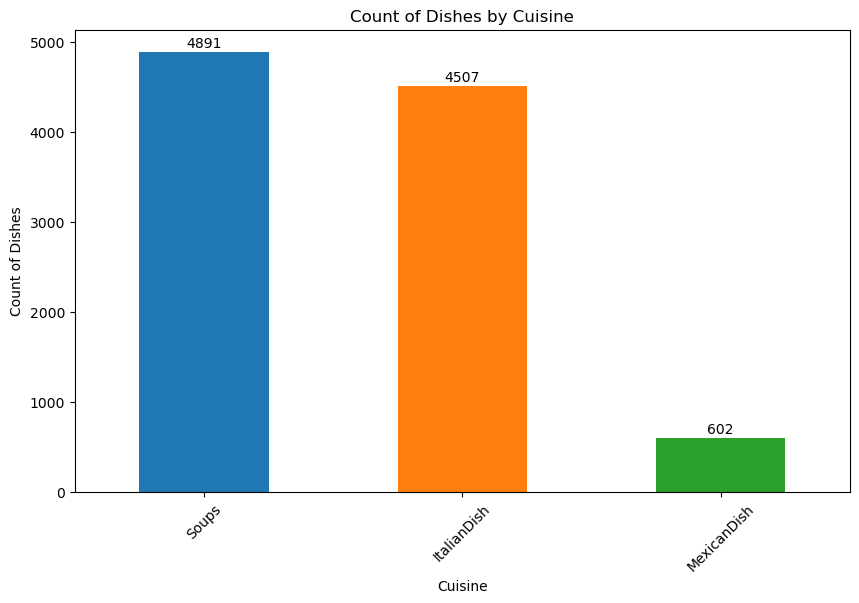

In [53]:
# 1.Calculate count by cuisine 
count_by_cuisine = df['cuisine'].value_counts()
average_price_by_type = df.groupby('type')['price'].mean()

# plotting the bar chart
plt.figure(figsize=(10, 6))
plt.style.use('default')  
count_by_cuisine.plot(kind='bar', color=plt.cm.tab10.colors)  
for index, value in enumerate(count_by_cuisine):
    plt.text(index, value + 50, f"{value}", ha='center')

#customize the plot
plt.title('Count of Dishes by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count of Dishes')
plt.xticks(rotation=45)
plt.show()

**INFERENCES FROM BAR CHART:**
1. Soups (4891) and ItalianDish (4507) are seems to be the specialties of the restaurant as these two cover large percent of all the menus, maybe due      to their high demand or can be central theme of the restaurant.
2. The lower count of Mexican Dish (602) ,indicates that they are not so popular among customers and are not frequently ordered.
3. The higher number of Soups and Italian dishes perhaps may look appealing to customers, as it give them a number of options to choose from in those      respective categories besides giving customer satisfaction.


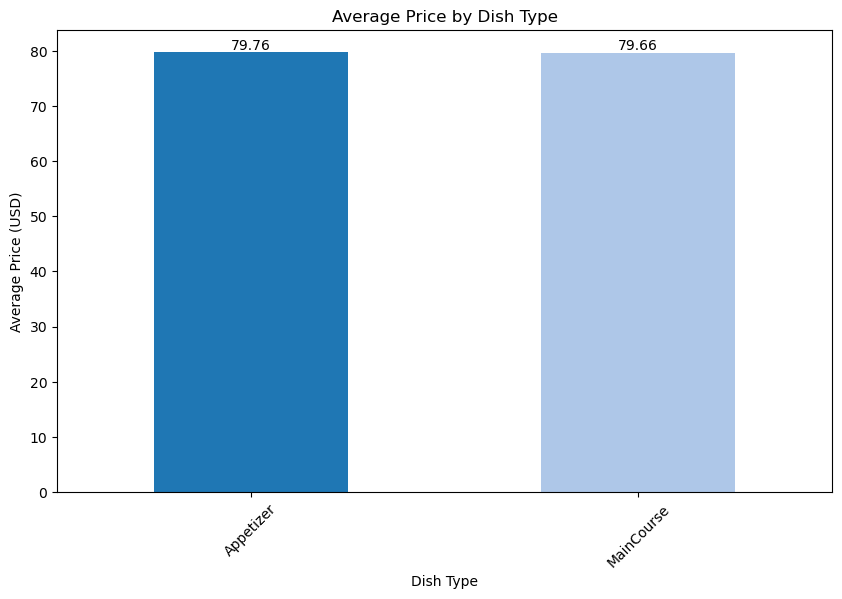

In [52]:
# 2.Calculate average price by dish type
# plotting the bar chart
plt.figure(figsize=(10, 6))
average_price_by_type.plot(kind='bar',color=plt.cm.tab20.colors)  
for index, value in enumerate(average_price_by_type):
    plt.text(index, value + 0.5, f"{value:.2f}", ha='center')

#customize the plot
plt.title('Average Price by Dish Type')
plt.xlabel('Dish Type')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

**INFERENCES FROM BAR CHART:**
1. Appetizers costing an average of 79.76(USD) are similarly priced to MainCourse dishes at 79.66(USD) showing a premium positioning of appetizers 
   as substantial or gourmet meals rather than a light, low cost starter course.
2. The proximity of prices mean that either Appetizers or Main Courses are qualify dishes or may consist of best ingredients and elaborate preparation     methods.
3. Similar prices across Appetizers and Main Courses products, gives customers an option of what they want to order. This consistency makes them to try    out different products from the menu.


**2. PIE CHART**

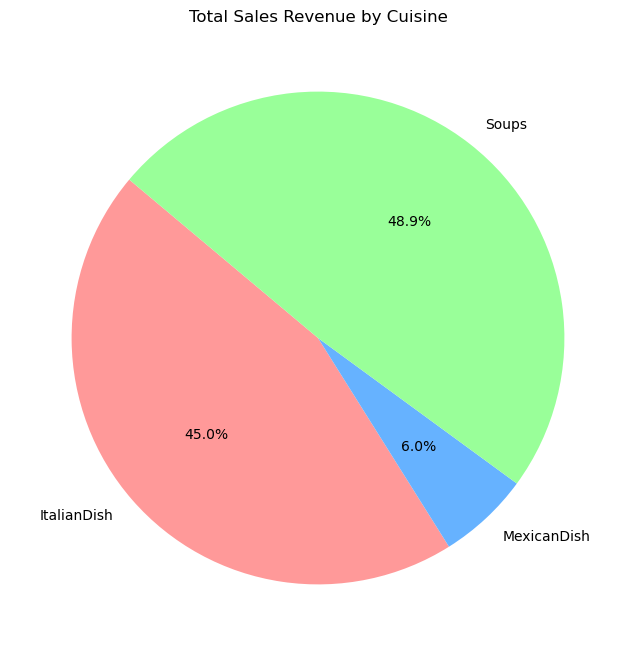

In [60]:
# 1. Pie Chart for Total Sales Potential by Cuisine
# Calculating total price by cuisine to visualize revenue potential by cuisine

#plotting the pie chart
total_price_by_cuisine = df.groupby('cuisine')['price'].sum()
plt.figure(figsize=(8, 8))
plt.pie(
    total_price_by_cuisine,
    labels=total_price_by_cuisine.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#8A2BE2']
)

#customize the plot
plt.title('Total Sales Revenue by Cuisine')
plt.show()

**INFERENCES FROM PIE CHART:**
1. Soups or Italian are among the food types which has the largest share of sale opportunities, proving to be most popular or more expensive.
2. More sales potential for these cuisines indicate these as most favored by the customers, thereby getting more orders or high priced dishes within       these food types.
3. Mexican dishes with relatively low revenues seem to add new dishes rather than being part of the main business sales.

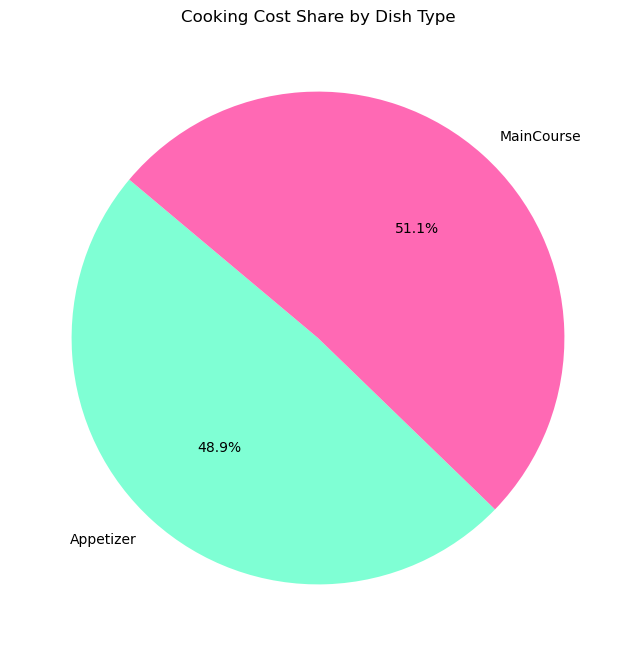

In [59]:
# 2. Pie Chart for Cooking Cost Share by Dish Type
# Calculating total cooking cost by dish type to visualize the distribution of preparation costs

#plotting the pie chart
cooking_cost_by_type = df.groupby('type')['cooking_cost'].sum()
plt.figure(figsize=(8, 8))
plt.pie(
    cooking_cost_by_type,
    labels=cooking_cost_by_type.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#7FFFD4', '#FF69B4', '#20B2AA', '#FFA07A', '#DDA0DD', '#FFDAB9', '#4682B4']
)

#customize the plot
plt.title('Cooking Cost Share by Dish Type')
plt.show()

**PIE CHART INFERENCES:**
1.  Dish types such as Main Courses have a greater cost of cooking due to their ingredients quality or the complexity of the preparation method to warrant their price.2. Appetizers have moderate cooking cost in comparison to Main Couse.Hence,they are likely to be cheap and can be ordered as additional dishes.
3. The distribution of cooking costs also provides evidence for the relevance of the prices to the preparation process of each meal in the restaurant.
4. Proper management of the cooking cost may increase the profitability of the restaurant business.

**3.LINE PLOT**

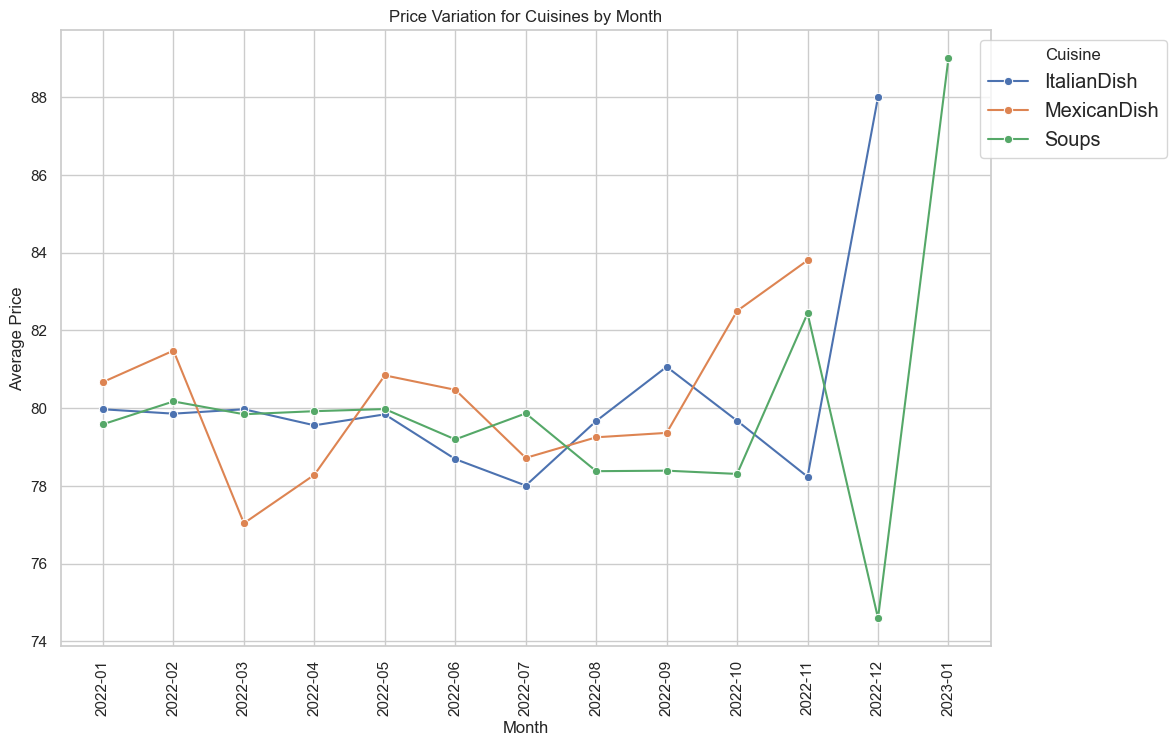

In [222]:
# 1. Calculate Price Variations over time
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Replace infinite values with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Extract month and year from 'date'
df['month'] = df['date'].dt.to_period('M')

# Use pivot_table to calculate the average price for each cuisine in each month
pivot_table = pd.pivot_table(df, values='price', index='month', columns='cuisine', aggfunc='mean').reset_index()

# Convert 'month' to string for plotting
pivot_table['month'] = pivot_table['month'].astype(str)

# Set the plot style
sns.set(style="whitegrid")

# Create a line plot 
plt.figure(figsize=(12, 8))
for cuisine in pivot_table.columns[1:]:  # Skip 'month' column
    sns.lineplot(x='month', y=cuisine, data=pivot_table, label=cuisine, marker='o')

# Customize the plot
plt.title('Price Variation for Cuisines by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Cuisine', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize='large')
plt.xticks(rotation=90)

plt.show()


**LINE PLOT ANALYSIS:**
1. The price of Soups increases in December which may be attributed to high demand during the holiday season.2. 
Mexican dishes keep their prices relatively constant, and experience marginal changes, this make it easy for customers to always budget when            consuming it.3. 
Italian dishes have a fairly stable pricing but they have spikes at times could be at seasons or gourmet products4. .
The fluctuation observed in prices particularly in December indicates influence from seasonal discounts or prices of some ingredients.

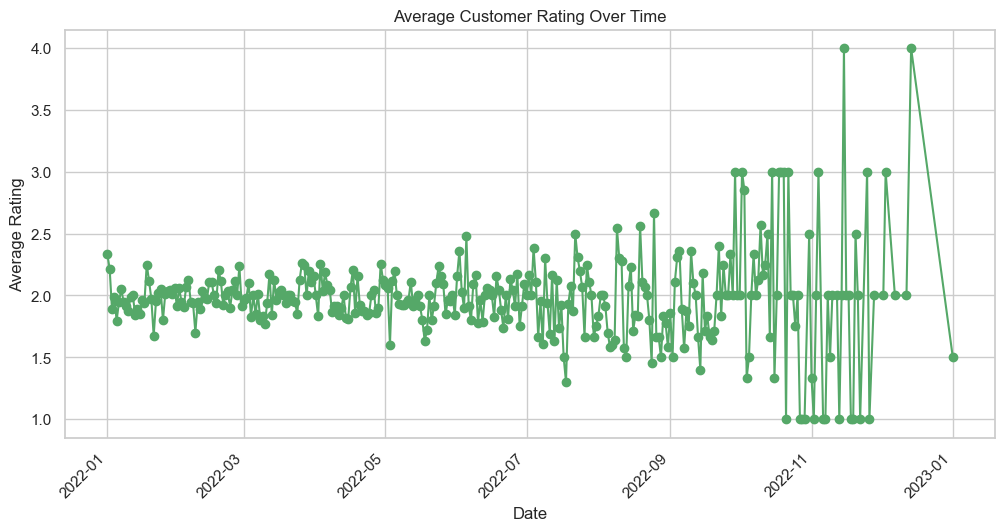

In [93]:
# 2.Calculate average rating by date
avg_rating_by_date = df.groupby('date')['rating'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
avg_rating_by_date.plot(kind='line', marker='o', linestyle='-', color='g')

# Customize the plot
plt.title('Average Customer Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


**INFERENCES FROM LINE PLOT:**
1. Consistent rating over time illustrate that customers are satisfied most of the time but drops may indicate a problem with either the food offered      or the service offered.2. Certain months witness a high number can be due to seasonal prices, promotions or new dishes in the menu.
3. If some months have less a rating, it signifies to work on the menu or the service during those particular months.

4. Through promotions or offers, the customers are happy hence rate highly on products during such occasions.



**4. HISTOGRAM**

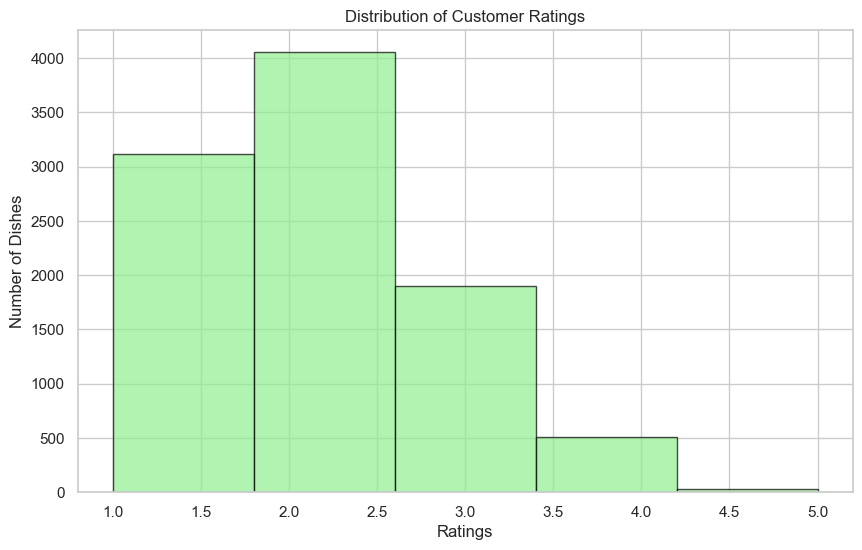

In [102]:
# Create a histogram for customer ratings

#plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=5, color='lightgreen', edgecolor='black', alpha=0.7)

# customize the plot
plt.title('Distribution of Customer Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Dishes')

plt.show()


**INFERENCES FROM HISTOGGRAM:**

1. The majority of th dishess get an average score of 1.0 to 2.5 points which imply tha most of the dishes  do not meet customer expectations.

2. Fewer items are in the 2.5 to 3.5 grades indicating that while some dishes might be dish acceptable to customers but not exceptional.
3. Few dishes have ratings more than 3.5 and no many dishes are ranging 4.5 to 5.0 showing that there are very few dishes in menu that customers can always order.
4. The histogram is skewed right, WHICH means most of the ratings are fell in between 1.0 – 2.0.This reflects a general dissatisfaction from customer expectations across the menu.

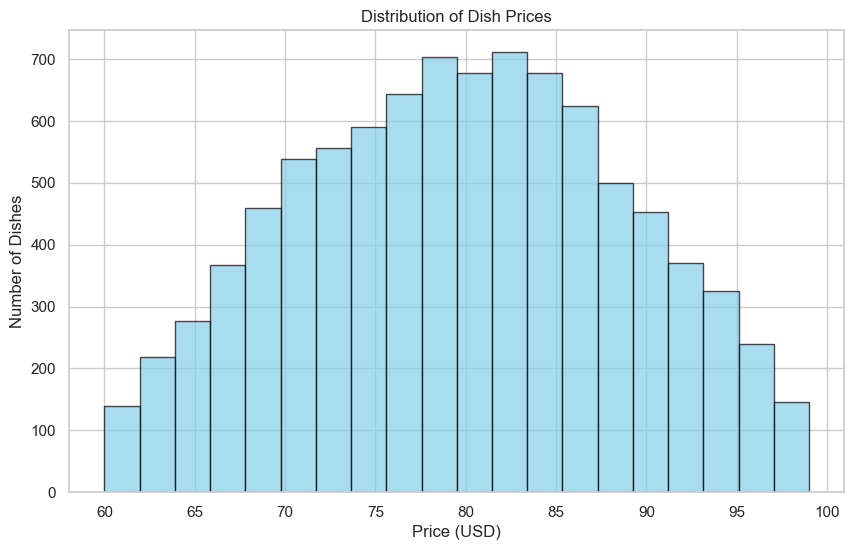

In [106]:
# Create a histogram for dish prices

#plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# customize the plot
plt.title('Distribution of Dish Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Dishes')
plt.show()


**INFERENCES FROM HISTOGRAM:**
1. The histogram is approximately symmetrical, with even distribution of prices around the center.
2. The majority of dishes go for between 75(USD) and 85(USD), which means that the restaurant wishes to offer reasonable food prices.

3. There are less number of dishes which are under 65(USD) and above 95(USD) which means that there are very few options for a very low price or a high end premium price.
4. The absence of extreme skewness suggests a good developmental strategy in the choice of the price range. 


**5. BOX PLOT**

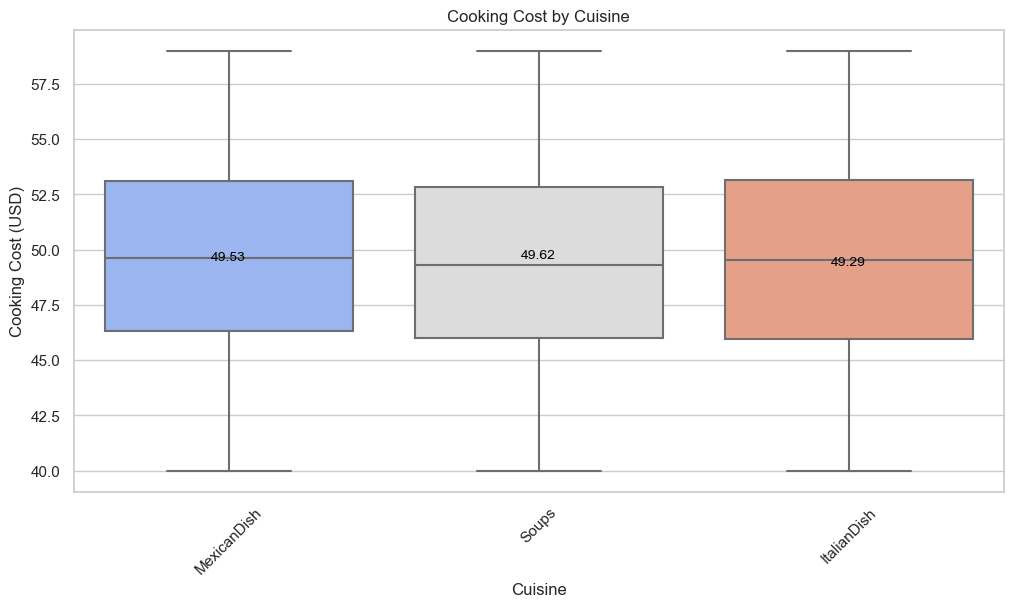

In [112]:
# Create a box plot for cooking costs by cuisine

#creating the box plot
plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(x='cuisine', y='cooking_cost', data=df, palette='coolwarm')

# Calculate medians for each cuisine group
medians = df.groupby('cuisine')['cooking_cost'].median()

# Annotate the median values on the plot
for index, median in enumerate(medians):
    plt.text(index, median, f'{median:.2f}', horizontalalignment='center', color='black', fontsize=10)

# Customize the plot
plt.title('Cooking Cost by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Cooking Cost (USD)')
plt.xticks(rotation=45)

plt.show()


**INFERENCES FROM BOX PLOT:**
1. The median cooking costs are 49.53(USD) for Mexican dishes, 49.62(USD) for Soups, and 49.29(USD) for Italian dishes, this implies that cooking costs    across cuisines are fairly 
   consistent with small variation.
2. The range (IQR) of Mexican dishes and Italian dishes are relatively larger than that of the Soups implying that there is more variation in the          preparation cost of these cuisines. 
3. Since,data has no outliers which implies that cost of cooking all the cuisines are well controlled to fall within the expected range.
4. Both medians and total ranges are quite similar, this means that the restaurant indeed employs the same cost approach to preparing various dishes 
   regardless of the cuisine type.
5. Soups have consistent cooking costs, likely because they’re standardized, while Mexican and Italian dishes show more variation, which could benefit     from a closer look to manage
costs better.

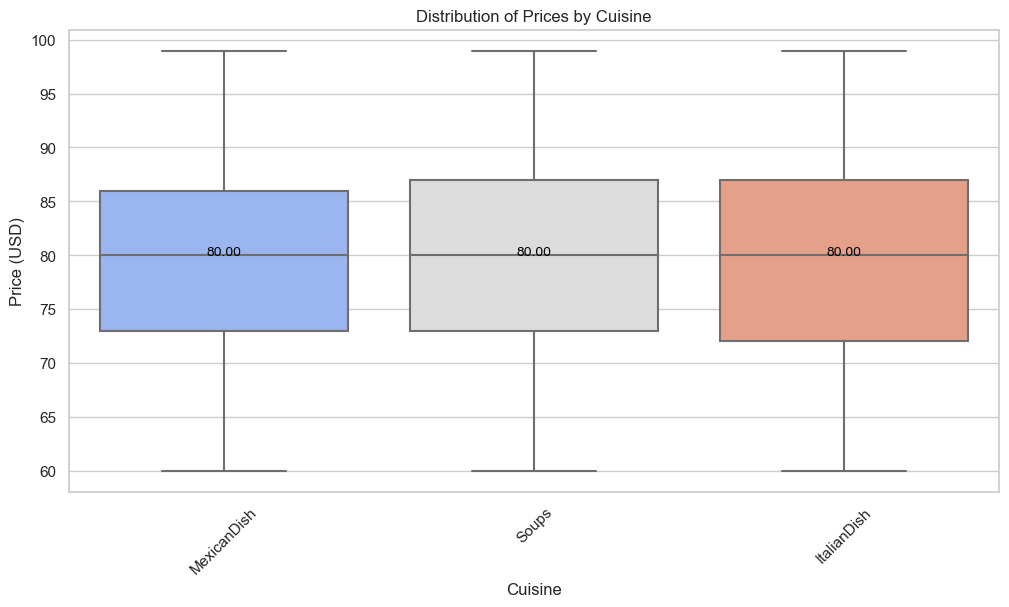

In [123]:


# Create a box plot for distribution of prices by cuisine

#creating the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine', y='price', data=df, palette='coolwarm')

# Calculate medians for each cuisine
medians = df.groupby('cuisine')['price'].median()

# Annotate the median values on the plot
for index, median in enumerate(medians):
    plt.text(index, median, f'{median:.2f}', horizontalalignment='center', color='black', fontsize=10)

# Customize the plot
plt.title('Distribution of Prices by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)

plt.show()


**BOX PLOT ANALYSIS:**
1. All the cuisine have median price of 80(USD) this shows that different foods such as Mexican, Soups, Italian dishes have consistent prices.
2. Soups are priced more consistently in comparison with Mexican and Italian dishes,that have more variation in pricing
3. The prices across all cuisines are between 60(USD) to 100(USD), this shows restaurant does not have high or very low price for dishes
4. All the items in Soups have uniform price range, whereas Mexican and Italian dishes provides options for both budget and premium dishes.
5. The data consistently show the median and moderate prices for all categories of food, which means that the restaurant targets providing 
   delicious and cheap food for all types.


**6. HEAT MAP**

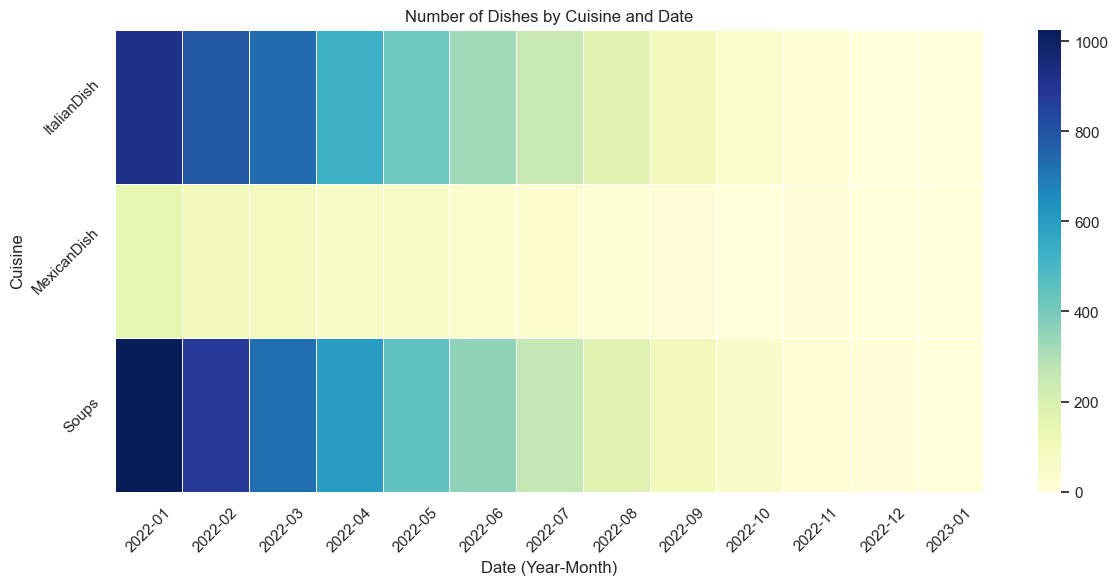

In [142]:
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['month_year'] = df['date'].dt.to_period('M')

# Create a pivot table for the number of dishes by cuisine and date
dishes_by_date_heatmap = pd.pivot_table(df, values='dish', index='cuisine', columns='month_year', aggfunc='count', fill_value=0)

# Create the heatmap 
plt.figure(figsize=(14, 6))
sns.heatmap(
    dishes_by_date_heatmap, 
    annot=False,  # Turn off annotations
    cmap='YlGnBu', 
    linewidths=0.5
)

# Customize the plot
plt.title('Number of Dishes by Cuisine and Date')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Cuisine')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()


**HEAT MAP ANALYSIS:**

1. Italian dishes appear to be offered most often, but this number declines over time, suggesting that reduction of menu size for this cuisine.
2. There are no or one or two Mexican dishes per month; this indicates that this category has little or no variations.
3. Soups have similar number of dishes in different months which confirms they are regular on a menu.
4. The count of dishes for all cuisines reduces over the time that might be due to the reduction in number of cuisines or menu is being standardized.
5. Increasing the variety of MexicanDish and, at least, keeping or increasing servings of ItalianDish and Soups can show the better understanding of customers’ choice.








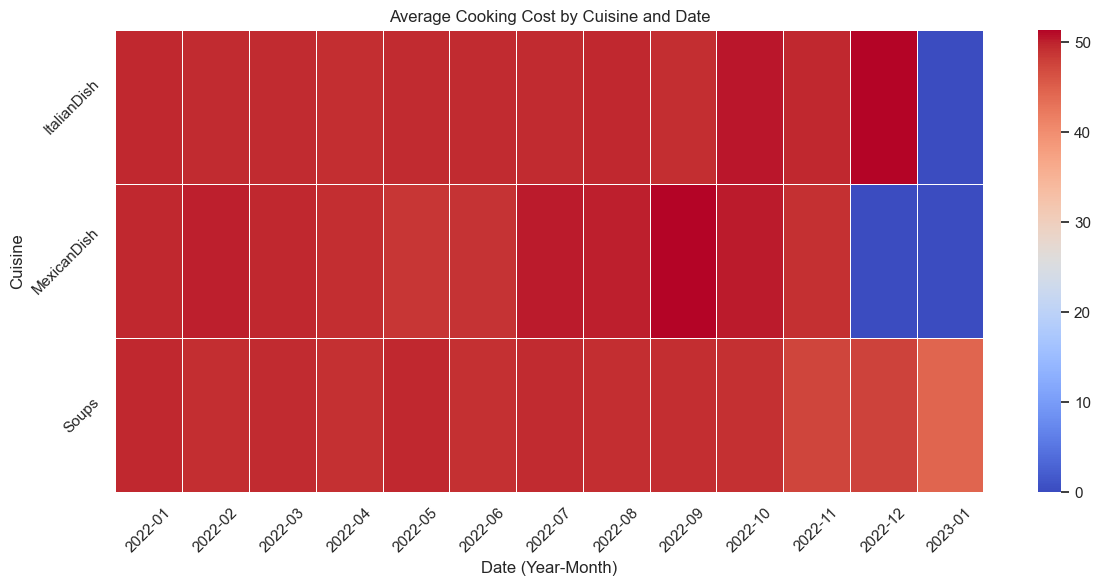

In [150]:
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['month_year'] = df['date'].dt.to_period('M')

# Create a pivot table for average cooking cost by cuisine and date
avg_cooking_cost_heatmap = pd.pivot_table(df, values='cooking_cost', index='cuisine', columns='month_year', aggfunc='mean', fill_value=0)

# Create the heatmap 
plt.figure(figsize=(14, 6))
sns.heatmap(
    avg_cooking_cost_heatmap, 
    annot=False,  # Do not display values
    cmap='coolwarm', 
    linewidths=0.5
)

# Customize the plot
plt.title('Average Cooking Cost by Cuisine and Date')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Cuisine')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()


**INFERENCES FROM HEATMAP:**
1. ItalianDish and Soups have consistent cooking costs with high efficiency on the preparation process.
2. In December2022, there is a drop in the cooking cost of talianDish and MexicanDish,this can be as a result of low cost of the raw materials 
   used or efficiency gains.
3. The cooking cost of MexicanDish is comparatively high in initial months because of high costs of ingredients or complicated preparation.
4. The cooking costs of soups are the most consistent indicating that the preparation process of soups is standardized.
5. MexicanDish costs could be optimized, while stable costs in ItalianDish and Soups can guide other cuisines cost management.

**7. SCATTER PLOT**

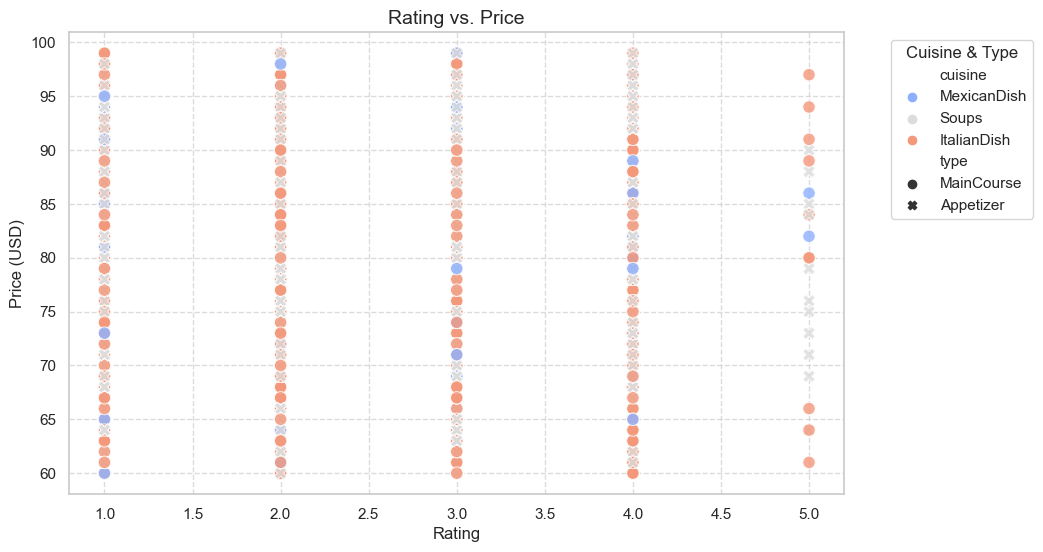

In [162]:
# Set the plot style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="rating", y="price", hue="cuisine", style="type", data=df, s=80, alpha=0.8, palette="coolwarm")

# Customize the plot
plt.title("Rating vs. Price", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(title="Cuisine & Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="both", linestyle="--", alpha=0.7)

plt.show()


**SCATTER PLOT ANALYSIS:**
1. Prices are grouped into fixed levels (like 60(USD), 75(USD), 80(USD), and 100(USD)), and these levels don’t seem to change much based on
   customer ratings.
2. The majority of the Italian dishes are above 80(USD), which shows that most of them are regarded as speciality dishes in the menu.
3. Mexican dishes are usually more affordable, mostly priced between 60(USD) and 70(USD).
4. Soups have steady pricing, staying between 75(USD) and 85(USD) irrespective of the ratings.
5. Ratings don’t seem to affect prices much, as all price levels include dishes rated from 1 to 5


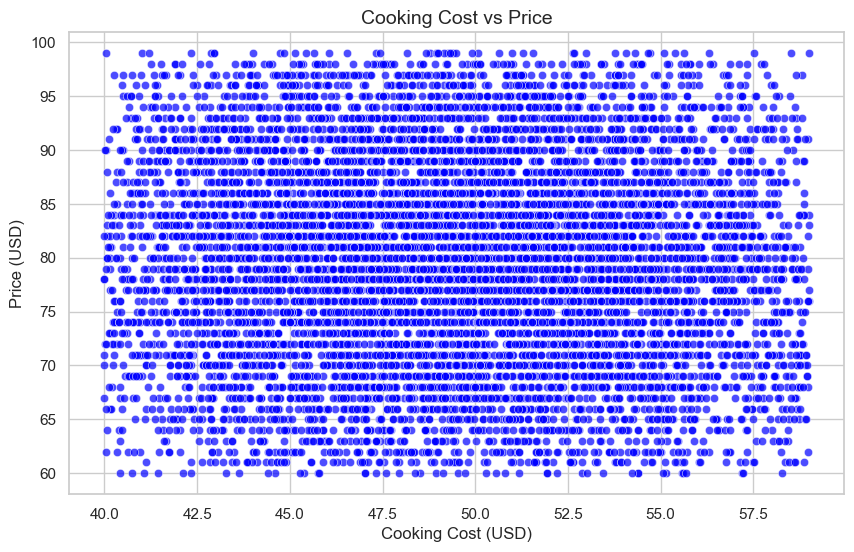

In [168]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = sns.scatterplot(x='cooking_cost', y='price', data=df, alpha=0.7, color='blue')

# Customize the plot
plt.title('Cooking Cost vs Price', fontsize=14)
plt.xlabel('Cooking Cost (USD)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
handles, labels = scatter.get_legend_handles_labels()
if handles:
    plt.legend(handles, labels)

plt.show()


**SCATTER PLOT ANALYSIS:**
1. Prices are grouped in ranges, like 60(USD), 75(USD), 85(USD), and 100(USD), regardless of the cooking costs.
2. There’s no strong connection between cooking cost and price, as dishes with the same cost are priced very differently.
3. Many of the dishes have cooking cost in the range of roughly 45(USD) to 50(USD), making this standard cost range.
4. High-priced dishes appears at all cooking  cost levels, indicating that prices are based  perceived values rather than preparation cost
5. The range of prices for similar cooking costs entails opportunities of increasing the prices and enhancing the profits.

## CONCLUSION

**The following conclusions are inferred from the generated visuaizations:**
1. The specialty of the restaurant is Soups and Italian food, however there is a larger opportunity for growth for Mexican food options in the menu.
2. Pricing remains constant.however, Italian food products are in the higher end while Mexican foods are relatively cheaper.
3. Costs of soups are constant and so with their prices, Mexican and Italian foods could be improved on with reduced costs.
4. Seasonal trends, such as lower Soup prices during winter while giving many special offers on Mexican dishes ensure customer satisfaction.
5. Most the dishes have low overall ratings, which means that their quality needs to be improved and thus there must be dishes that customers prefer.
6. Making cost as its main priority, emphasizing affordability, and popularity of Soups & Italian selection may increase revenues and customer's           satisfaction.

In summary, this enables the restaurant to contemplate menu performance, price trends and customer preference in efforts to raise satisfaction rates and profitability.


## RECOMMENDATIONS

1. Increase the number of Mexican Dishes Offered and also  unique items across all cuisines to satisfy wide range of customers
2. Provide specialty feedback areas such a taste, portion size, and value to know reasons for low ratings.
3. Specify records of changes with the seasons, events and promotions, so as to examine trends of both the prices and demand.
4. Integrate the costs of labor and ingredients to understand better the pricing and the margins of the profit.
5. Make sure the dataset is updated relatively often, and at least, delete entries that are no longer valid in order to maintain accuracy and relevance.
